In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
dataset = pd.read_csv('/content/Salary Data.csv')


In [ ]:
X = dataset.iloc[:,:-1]
Y = dataset.iloc[:,1]

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.33, random_state=0)

In [ ]:
regressor.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_predit = regressor.predict(X_test)


In [ ]:
y_pred = regressor.predict(X_train)

In [ ]:
from sklearn.metrics import r2_score
score = r2_score(y_test,y_predit)
score

0.9749154407708353

In [ ]:
from sklearn.metrics import mean_squared_error
MSE  = mean_squared_error(y_test,y_predit)
MSE

21026037.329511296

In [ ]:
rmse = np.sqrt(MSE)

In [ ]:
rmse

4585.4157204675885

In [ ]:
from sklearn.metrics import mean_absolute_error

# Assuming you have y_true and y_pred as NumPy arrays or lists
# y_true: True target values
# y_pred: Predicted values from your model

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_predit)

print("MAE:", mae)


MAE: 3426.4269374307078


In [ ]:
# Check for missing values in the entire DataFrame
missing_values = dataset.isnull().sum()

# Print the count of missing values for each column
print(missing_values)


YearsExperience    0
Salary             0
dtype: int64


In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
mse = cross_val_score(regressor,X,Y,scoring = 'neg_mean_squared_error',cv=5)
mse

array([-25905138.76967999, -30974669.99857574, -59780662.11837491,
       -68417038.21806611, -35766738.23965806])

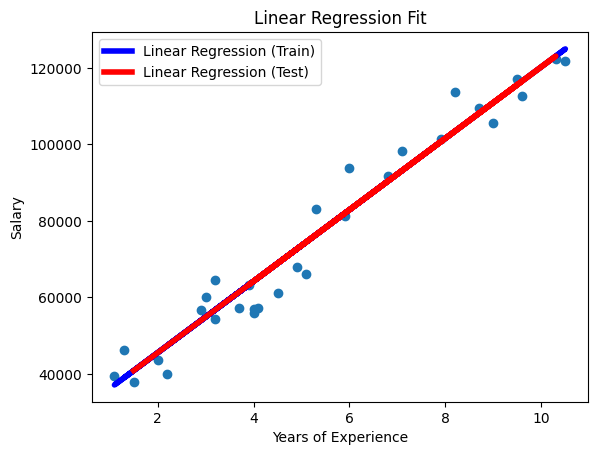

In [ ]:
plt.scatter(dataset["YearsExperience"], dataset['Salary'])
plt.plot(X_train, y_pred, lw=4, color='blue', label='Linear Regression (Train)')
plt.plot(X_test, y_predit, lw=4, color='red', label='Linear Regression (Test)')
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.title("Linear Regression Fit")
plt.legend()
plt.show()

## Making Prediction for Custom Input data
### Input data is the Experience

In [ ]:
dataset

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [ ]:
y_predit

array([ 40835.10590871, 123079.39940819,  65134.55626083,  63265.36777221,
       115602.64545369, 108125.8914992 , 116537.23969801,  64199.96201652,
        76349.68719258, 100649.1375447 ])

In [ ]:
X_test

,YearsExperience
2,1.5
28,10.3
13,4.1
10,3.9
26,9.5
24,8.7
27,9.6
11,4.0
17,5.3
22,7.9


In [ ]:
features = np.array([[1.5],[2]])
p = regressor.predict(features)
p

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([40835.10590871, 45508.07713028])

### Using Data Preprocessing to process the model and data

In [ ]:
y_predit

array([ 40835.10590871, 123079.39940819,  65134.55626083,  63265.36777221,
       115602.64545369, 108125.8914992 , 116537.23969801,  64199.96201652,
        76349.68719258, 100649.1375447 ])

In [ ]:
from sklearn.linear_model import Lasso

# Create a Lasso regression model
lasso_model = Lasso(alpha=1)  # Set the regularization strength (lambda) with alpha

# Fit the model to your training data
lasso_model.fit(X_train, y_train)

# Make predictions on the test data
y1_pred = lasso_model.predict(X_test)


In [ ]:
score_lasso = r2_score(y_test,y1_pred)
score_lasso

0.9749148425688454